# Question 1

## What is the Simple Linear Regression Model
- This is a model that is used to estimate the relationship between 2 quantitative continuous variables. It can be aided to find the strength of the association between the 2 variables and the value of the dependent variable at a given independent variable. The equation of the model is shown below.


$Y = \beta_0 + \beta_1 x + \epsilon$

- As stated just like the 2 variables it measures the relationship between the predictor variable x and the outcome variable Y
- $Y$: This is the dependent (or outcome) variable, the one we want to predict.
- $x$: This is the independent (or predictor) variable, the one we use to make predictions about $Y$.
- $\beta_0$: This is the intercept coefficient, which is the value of $Y$ when $x$ = 0.
- $\beta_1$: This is the slope coefficient usually used for the rate of change of the outcome($Y$) with respect to the predictor($x$). 
- $\epsilon$: This is the known as the error term where it represents the random variations that are not included model, assumed to follow a normal distribution with a mean of 0 and a fixed variance $\sigma^{2}$. It's the vertical distance between the actual data points and values predicted by the line.
<br>

- The predictor $x$ is chosen from a uniform distribution(a form of probability where every outcome is equally as liekly). In addition, the error $\epsilon$ will be drawn from a normal distribution. The following code is given below. 

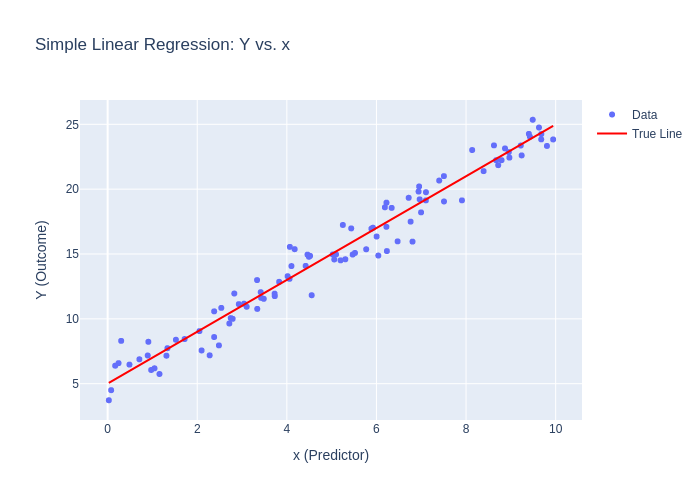

In [34]:
import numpy as np
import scipy.stats as stats # just needing to import the necessary libraries
import plotly.graph_objects as go


# Set parameters
n = 100  # number of data points that i want to be simulated
beta0 = 5  # intercept, like the y-intercept of a y = mx + b function that is set
beta1 = 2  # slope coefficient change of an outcome(y) by 2 for a predictor change(x) of 1
sigma = 1  # standard deviation of the error term

# This is the process of choosing the 10 random points from a uniform distribution to be used to predict $Y$
x = np.random.uniform(0, 10, n)

# Simulate error term epsilon (normal distribution with mean 0 and std dev sigma), this shows the noise or variability
epsilon = np.random.normal(0, sigma, n)

# Using the equation we used it generates the outcome($Y$) from the sum of the intercept, the slope coefficient, the predictor and error term.
Y = beta0 + beta1 * x + epsilon

# Create the plot
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add the theoretical line (without error)
y_line = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=y_line, mode='lines', name='True Line', line=dict(color='red')))

# Update layout
fig.update_layout(title='Simple Linear Regression: Y vs. x',
                  xaxis_title='x (Predictor)',
                  yaxis_title='Y (Outcome)',
                  showlegend=True)

# Show the plot
fig.show(renderer="png")

## Chat Summary - Simple Linear Regression Model Explanation and Simulation

__Theoretical Model Explanation:__ I asked for a breakdown of the theoretical Simple Linear Regression model. The chatbot explained that the model combines a set intercept and slope with an independent variable (x) and an error term to create the outcome variable (Y). The error term adds variability around the line defined by the intercept and slope.

__Python Code:__ The chatbot provided Python code to simulate data points around the regression line without fitting the model. The code generates predictor values, adds random noise (error term), and plots the theoretical line alongside the simulated data.

__Scope Confirmation:__ The chatbot confirmed that this code does not fit or estimate a model from the data; it only demonstrates the theoretical relationship by plotting a set line and simulated points around it, as requested.

Link: https://chatgpt.com/share/672c2882-26d4-800f-a3e2-e18458ad949d

# Question 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3450.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           3.39e-78
Time:                        04:19:32   Log-Likelihood:                -141.23
No. Observations:                 100   AIC:                             286.5
Df Residuals:                      98   BIC:                             291.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1019      0.188     27.086      0.0

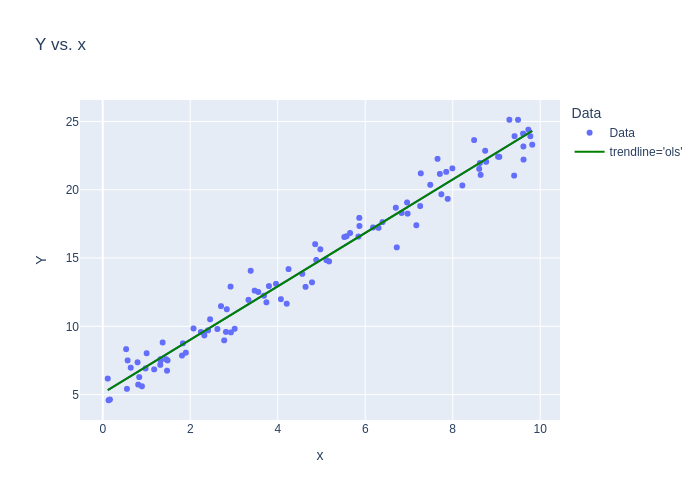

In [38]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
"""
This library is designed for statistical modeling, especially regression analysis. It allows users to specify 
models with formulas (like "Y ~ x"), making it easy to define relationships between a response variable (Y) and 
predictor variables (x).
"""

import plotly.express as px
"""
A high-level Python library for creating interactive, easy-to-customize visualizations. It includes functions to 
plot data with optional trendlines, such as Ordinary Least Squares (OLS) regression lines.
"""


  
n = 100            
beta0 = 5          
beta1 = 2          
sigma = 1         


x = np.random.uniform(0, 10, n)  
epsilon = np.random.normal(0, sigma, n)  
Y = beta0 + beta1 * x + epsilon  


df = pd.DataFrame({'x': x, 'Y': Y})


model_data_specification = smf.ols("Y ~ x", data=df)
"""
Model specification is the process of setting up a formula that defines how one variable depends on another. 
For example, using the smf.ols("Y ~ x", data=df) formula creates a model where Y is the outcome we're trying to 
predict (like test scores), and x is the predictor we're using to make that prediction (like study hours). 
The ols stands for Ordinary Least Squares, a method that finds the best-fitting line through the data to show the 
relationship between x and Y. Essentially, it's like telling the computer, "Show me how Y changes when x changes.
"""

fitted_model = model_data_specification.fit()  
"""
Fitting a model is the process of applying the model to real data to see how well it works. When you use 
model_data_specification.fit(), you're calculating the best-fitting line based on the data in your table 
(called df). This process adjusts the model's settings, like the slope and intercept, so that the 
line gets as close as possible to the data points. You're asking how can you match the model with the actual data. 
The result is a fitted model that shows the best relationship between the predictor (x) and the outcome (Y).
"""


print(fitted_model.summary())
"""
The one above displays a comprehensive summary of the model, covering coefficients, standard errors, 
t-statistics, p-values, and more.
"""

print(fitted_model.summary().tables[1])  
"""
Extracts a summary table showing coefficients, standard errors, and p-values.
"""

print(fitted_model.params) 
"""
Shows estimated intercept and slope values.
"""

print(fitted_model.params.values) 
"""
Provides these values as an array.
"""

print(fitted_model.rsquared)
"""
R-squared metric indicating model fit quality (proportion of variance explained).
"""


df['Data'] = 'Data'  
"""
The code above adds a column to df with the value "Data" for all rows, used to create a single label for 
all data points in the legend.
"""

fig = px.scatter(df, x='x',  y='Y', color='Data', trendline='ols', title='Y vs. x') 
"""
The code above creates a scatter plot with Y vs. x, with an OLS regression line as a trendline, and a title.
"""


fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='green'), name="trendline='ols'")  
"""
Adds the fitted line values manually to ensure customization of line color, style, or name. Even though 
the regression line is included in px.scatter, this step provides more control over appearance.
"""

fig.show(renderer="png")

# Chat Summary

## 1. Purpose of the Code:
- The code simulates a simple linear regression model, fits the model to the simulated data using Statsmodels, and visualizes the data along with the fitted regression line using Plotly Express.

## 2. Key Code Explanations:
- Statsmodels Library (smf): This library is used for statistical modeling, specifically for defining and fitting models like Ordinary Least Squares (OLS) regression.

- Plotly Express: Plotly Express is a plotting library used for creating interactive visualizations. It simplifies plotting and allows easy addition of regression lines.

## 3. Steps in the Code:
__Model Specification and Fitting:__
- First, the linear regression model is defined where Y is the dependent variable and x is the independent variable.
- Then, the model is fitted to the data to compute the best-fitting parameters, which include the intercept and slope.

__Summary Outputs:__
- The summary() function provides a detailed summary of the model, including coefficient estimates, standard errors, t-values, p-values, and R-squared.
- The tables[1] provides a table with the coefficient estimates for the intercept and slope.
- The params function displays the model parameters (intercept and slope).
- The params.values function gives the values of the coefficients without labels.
- The rsquared function shows the R-squared value, which indicates how well the model explains the variance in the dependent variable.

## 4. Plotting the Data:
- The data and the regression line are visualized using Plotly:
- A scatter plot is created with the data points, and the regression line is overlaid.
- The trendline is added using the OLS method, and the fitted values are manually added as a second line.

Link: https://chatgpt.com/share/672c3514-64bc-800f-85cc-df02f3a6a858

# Question 3

## Difference of the Two Lines
- A little brief explanation I used the code from the GitHub homework to overlap the two lines or the two regression models I created in the previous two questions. The true line represents the OLS fitted model while the 5 + 2x represents the theoretical simple linear regression model.

## Nature of Theoretical Line
- Regarding the nature of the first line which is the question, it uses the true underlying relationship between the predictor and outcome variables with the assumptions that the parameters are completely correct and accurate and the error term is 0. This line does not account for the noise or you can call it the complexity or variance of the data samples.

## OLS Fitted Line
- The OLS fitted line, in contrast, adjusts its parameters to minimize the error term by incorporating the random variance introduced by the noise($\epsilon$). This line represents an estimate of the true relationship, based on a single sample. Although it attempts to approximate the true line, it will vary slightly due to the random noise in each dataset. By fitting multiple simulations, the average of these fitted lines would get closer to the true line, illustrating the effect of sampling variability and the impact of random noise on the estimation process.

## Difference between the two
- The key difference between the 2 is the implementation of the random sampling variation that impacts the estimation of the parameters. Every simulation will have its own respective error and randomness.By visualizing many simulated datasets, the OLS regression line demonstrates how well the model can capture the underlying relationship, even with inherent randomness.

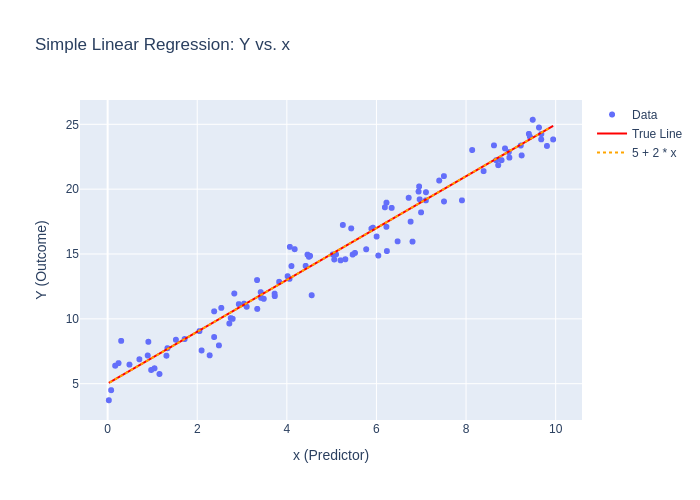

In [35]:
# Range of x values to plot the theoretical line
x_range = np.array([df['x'].min(), df['x'].max()])

# Theoretical line based on the true beta0 and beta1
y_line = beta0 + beta1 * x_range

# Add the theoretical line as a dotted orange line
fig.add_scatter(x=x_range, y=y_line, mode='lines', 
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

# Chat Summary
- In this chat, I worked on combining and understanding two sets of code for visualizing linear regression models with simulated data. The goal was to compare the OLS fitted line with a theoretical line (5 + 2x) to demonstrate the effects of random sampling variation in regression modeling.

## Code Review:
- The first code generates a theoretical dataset with random noise, plotting a scatterplot of simulated points with a "true" theoretical line (5 + 2x).
- The second code fits an Ordinary Least Squares (OLS) regression line to the data, which minimizes the error term to estimate the best fit line given the sample.

## Overlaying Lines:
- I then combined the two plots by adding the theoretical line (5 + 2x) to the plot generated in the OLS code. This allows for a visual comparison between the two.

## Explanation of Differences:
- The OLS fitted line attempts to approximate the true relationship by minimizing error. It reflects the variability introduced by random sampling and noise($\epsilon$) , so each fitted line may vary slightly when re-simulated. As more samples are simulated, the average of these lines converges closer to the true relationship.
- The theoretical line (5 + 2x) represents the idealized relationship without noise. It stays constant, showing what the relationship would look like in a perfectly noiseless world.

Link: https://chatgpt.com/share/672c40d8-57e8-800f-a8cc-aded010da7da

# Question 4

- Before answering the question it's beneficial to explain that we are using the simple linear regression model using estimated parameters which can be shown below.

$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

- The key difference of the top hat is that these are estimated values of the population parameters(slope coefficient and etc.). These are calculated based on the sample data that I used to model the fitted linear regression model.

## How it is Derived
- Relating back to the question fitted_model.fittedvalues is essentially the table of values one could say for the fitted linear regression model where an input or predictor value($x$) has its calculations based off of the made fitted linear regression to produce an outcome($Y$). 
- At first the model tries its best to fit itself to find the best-fitting linear regression model to create an equation mentioned above about an estimation of the population parameters. This is contained in fitted_model.summary().tables[1] showing all the table information about the parameters, statistical significance, etc. More specifically the parameters can be seen in fitted_model.params.
- As said the parameters like the intercept and the slope are accessed and that can be used to calculate the fitted values within the dataset
- Each data point is plugged into that fitted linear regression model to have the fitted linear outcome($Y$).
- So the fitted_model.fittedvalues just to restate it, contains the predictor values and their corresponding outcome values($Y$) based on the estimated equation.


# Chat Summary

__Explanation of Fitted Model Values in Linear Regression__
- In linear regression, the "fitted values" refer to the predicted values of the dependent variable that come from the regression model after it has been trained on the data. These fitted values are derived from the estimated parameters (intercept and slope) of the model.

__To explain it more clearly:__
- The model estimates the intercept and slope based on the sample data.
- These estimated parameters are then used to calculate the predicted value of the dependent variable for each value of the independent variable in the dataset.

<br>
- The predicted values are the fitted values, which are calculated using the estimated intercept and slope. These values represent what the model predicts for the dependent variable based on the given independent variable. The fitted values are important because they allow us to compare the model's predictions with the actual observed data points and assess how well the model fits the data.

Link: https://chatgpt.com/share/672c4f32-2ac4-800f-806b-502b3fcd4214

# Question 5

- Just as a recap, the Ordinary Least Squares (OLS) method is a way to fit a simple linear regression line to observed data. The OLS method minimizes the sum of squared errors (or residuals), meaning it chooses the line that best fits the data by keeping this sum as small as possible.
- Residuals are the vertical distances between observed data points and the fitted line.


__The errors (residuals) are squared for two main reasons:__
- Amplifying large deviations: Squaring the residuals gives more weight to larger errors, making it more sensitive to points that are far from the line. This is similar to the effect of a power function.
- Preventing cancellation: Squaring ensures that positive and negative residuals do not cancel each other out. Without squaring, residuals above the line would offset those below, leading to an inaccurate representation of total error in the model.
<br>

- You can see at the bottom a code that shows different lines and how each line varies with each observed data point by having a different vertical distance depicted by the red dashed line.

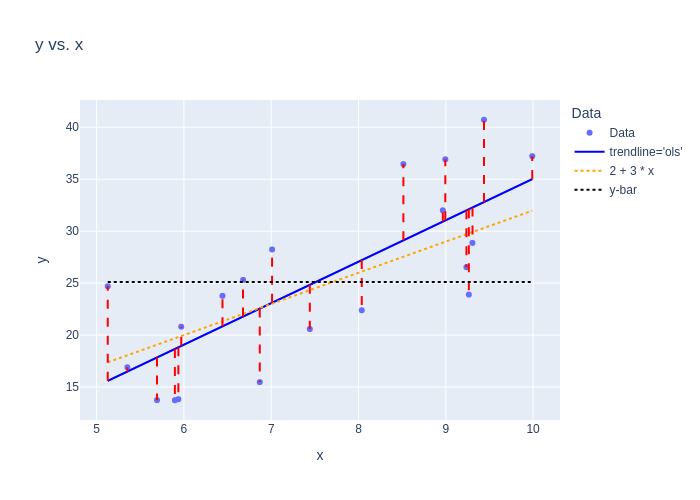

In [3]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Define parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

# Create DataFrame with lowercase 'y' to match the DataFrame column name
df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data'  # Hack to add data to legend
fig = px.scatter(df, x='x', y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# Add trendline from fitted model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer = "png") 

# Chat Summary
- The Ordinary Least Squares (OLS) method is used to fit a linear regression line to observed data by minimizing the sum of squared errors, or residuals. The line chosen by OLS is the one with the smallest possible sum of these squared residuals. Residuals represent the vertical distance between each observed data point and the fitted line. Squaring these residuals serves two purposes: it amplifies larger deviations, making the model more sensitive to outliers, and it prevents positive and negative residuals from canceling each other out, which helps provide an accurate measure of the overall error in the model.

Link: https://chatgpt.com/share/672cca82-74d4-800f-894b-be3d657dac17

# Question 6

$
R^2 = 1 - \frac{\sum_{i=1}^n (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^n (Y_i - \bar{Y})^2}
$

- As seen from above the equation is the calculation for the r-squared value which takes into account the variation of the simple linear regression. The denominator represents the sum of squares which means the total variation. It takes the sum of squared difference between an observed value $Y_{i}$ and the mean of $𝑌$, $\hat{Y}$, summing across all data points. This captures the total variation in $Y$.
- The numerator on the other hand calculates how much from that total variation is unexplained and calculates that via in the previous question, which is the sum of the squared residuals which are the vertical differences of an observed data point to the fitted linear model.
- This initial fraction explains the proportion of the total variation that is not explained due to randomness or unpredictable factors.
- Subtracting this fraction from 1 gives the proportion of the variation that is actually explained meaning it has identified the pattern of the relationship between the predictor value($x$) and the outcome($Y$) meaning it is accounted for.
- __fitted_model.rsquared:__ directly gives the r-squared where a larger number indicates a higher accuracy of the model.
- __np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2:__ this expression calculates the square of the correlation coefficient between the observed values of Y and the predicted values of Y-hat. In simple linear regression, this squared correlation is equivalent to R-squared. The correlation coefficient measures the strength and direction of the linear relationship between the observed and predicted values. Squaring the correlation coefficient gives the proportion of the variance in Y that is explained by the predicted values, which is the definition of R-squared.
- __np.corrcoef(Y,x)[0,1]**2:__ This expression calculates the square of the correlation coefficient between the observed values of Y and the independent variable X. This captures the linear relationship between X and Y, showing how well X can explain or predict Y. While this isn't the same as R-squared from the regression model, it measures how strongly X correlates with Y and how much of the variation in Y can be explained by X alone. This value is typically smaller than R-squared because the regression model accounts for more variation than X does by itself.

# Chat Summary

- R-squared (R²) measures the proportion of variation in the outcome variable Y explained by the fitted model.
- The numerator of R-squared represents the residual sum of squares (RSS), which is the unexplained variation in Y after fitting the model.
- The denominator of R-squared represents the total sum of squares (TSS), which is the total variation in Y relative to its mean.
- R-squared is interpreted as the accuracy of the model—higher R² means a better fit, with more of the variation in Y explained by the model.
- Squared correlation coefficient between observed and predicted values (Y-hat) is equivalent to R-squared in simple linear regression.
__Correlation between Y and X measures how strongly the independent variable X is related to Y before applying the model.__
- This value is typically smaller than R-squared because the model includes more information than just X alone.
<br>

- The difference between R-squared and the correlation of Y with X is that R-squared accounts for the model's prediction, whereas the correlation with X only considers how X relates to Y.
- We also discussed how visualizing total variation, explained variation, and residuals can help understand R-squared and the accuracy of the model's predictions.

Link: https://chatgpt.com/share/672cedcf-a710-800f-9f88-5b2ee40550f0

# Question 7
- The code below is a simple linear regression analysis where it uses the relationship between the fertilizer used in kg (independent variable) and crop yield in tons(dependent variable).

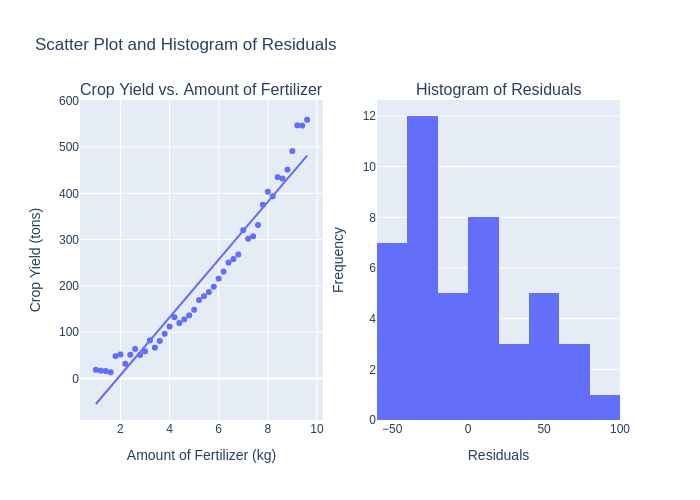

In [2]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") 

__Some of the assumptions include:__
1. __Linearity:__ The relationship between the predictor $x$ (amount of fertilizer) and the response $y$ (crop yield) should be linear.
2. __Independence:__ The observations should be independent of each other.
3. __Homoscedasticity:__ The residuals (errors) should have constant variance.
4. __Normality of Residuals:__ The residuals should be approximately normally distributed.
5. __No Perfect Multicollinearity:__ This is not a concern in single-variable linear regression, as we only have one predictor.

## The problems with the Assumptions:
- __Linearity:__ The scatter plot of crop yield against fertilizer amount shows that the relationship isn’t straightforward or linear. Crop yield doesn’t increase at a steady rate as more fertilizer is applied. Instead, there appear to be points where yield plateaus or grows faster. This suggests that a linear trendline wouldn’t fully capture the pattern, so the assumption of linearity might not be appropriate here.
- __Homoscedasticity:__ Looking at both the histogram of residuals and the residuals plot, you may see that the spread of residuals varies at different fertilizer levels. For instance, residuals might be more widely scattered at higher fertilizer amounts, pointing to heteroscedasticity. This indicates that the assumption of homoscedasticity, or constant variance, likely doesn’t hold.

## Chat Summary
- This analysis uses linear regression to understand how the amount of fertilizer impacts crop yield. Here’s a simple breakdown of what the code does and how it addresses the assumptions of linear regression:

1. __Data Setup:__ The code starts by organizing the fertilizer and crop yield data in a table format, making it easier to work with.

2. __Scatter Plot with Trendline:__ A scatter plot is created to show the relationship between fertilizer and crop yield, with a line added to represent the best linear fit. This visual check helps assess whether a linear relationship (a straight-line trend) exists, which is one key assumption of linear regression.

3. __Regression Calculation:__ Using a statistical tool, the code calculates the line's slope and intercept, and it tests if the relationship is statistically significant. This tells us if fertilizer amount is likely to predict crop yield reliably.

4. __Residuals (Errors):__ The code calculates residuals, which are the differences between the actual crop yields and what the linear model predicts. Residuals help us see if there are any patterns or issues that might break the model’s assumptions.

5. __Histogram of Residuals:__ A histogram of these residuals is generated to check if they follow a normal (bell-curve) shape. If they do, it supports the assumption that errors are normally distributed, another important requirement.

6. __Combined Plot Display:__ Finally, the code shows the scatter plot and histogram together for easier analysis.

Link: https://chatgpt.com/share/672d3cc9-291c-800f-86f6-98cabf666963

# Question 8
- When you say there is a null hypothesis in terms of the linear association it means that the slope coefficient is equal to 0 meaning that there is no relationship at all between the predictor($x$) and the outcome($Y$) variable and it remained constant. This also means that $\beta_{1}$ = 0.
- The alternate hypthesis would just mean that there is some association or some relationship between the variable whether it's negative or positive and when the slope coefficient does not equal 0.
- In reference, in terms of the p-value which provides evidence against the null hypothesis, in context of the simple linear regression model, the p-value is if in a hypothetical situations where the slope coefficient is 0 how far off are the observed data points or extreme or how likely you are to see them in that situation.
- We can see the p-value for waiting is set the 0.000 which means it has very strong evidence to reject the null hypothesis suggesting there may be a relationship between the predictor($x$) variable and the outcome($Y$) variable.
- You can see the code below:

In [4]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        22:52:30   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Code Explanation
- Here, we're loading the Old Faithful dataset, which contains information on the duration of geyser eruptions and the waiting time between eruptions. We define a linear regression model where the response variable (duration) is modeled as a function of the predictor (waiting).
- The null hypothesis is that there is no linear association between waiting and duration.
- The alternate slope is that there is a linear association and there is a slope of waiting.
- The lower and lower the p-value in the stronger the evidence is against the null hypothesis because it's so rare to produce the observed data and have it have a low likelyhood.

# Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


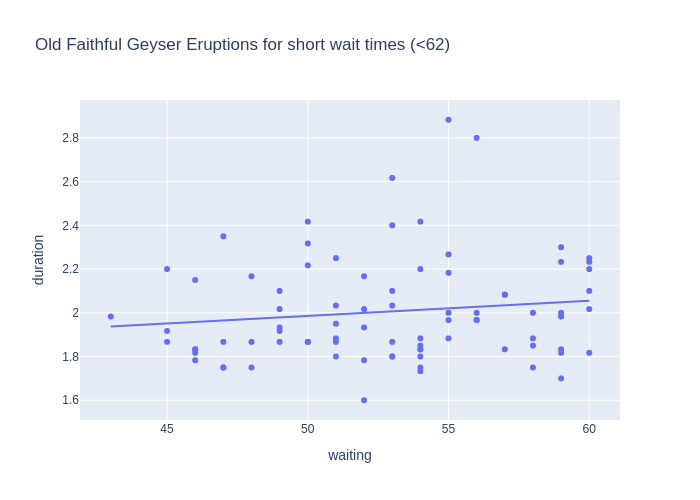

In [8]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

- The question notes that if the waiting time (on the x-axis) exceeds 63 minutes, the duration of the eruption increases notably. It then restricts the data to only short waiting times and asks whether there is a relationship between duration and waiting time that mirrors the full dataset.
<br>

- The code above produces both the statistics and the graph for the short waiting times and eruption durations. From the graph, we can observe that the waiting times reach a maximum of 60 minutes.
- The regression summary shows that the p-value for waiting is 0.238, which indicates that the relationship between waiting time and duration is not statistically significant for short wait times.
- Comparing this to the full dataset from Question 8, we find that the p-value in the full dataset is 0.000 (or very close to 0), which provides strong evidence against the null hypothesis, suggesting a significant relationship. In contrast, the p-value in the restricted model (short wait times) is 0.238, which fails to reject the null hypothesis and indicates no significant relationship.
- Therefore, in response to the second question, the evidence fails to reject the null hypothesis, as there is no significant relationship between waiting time and eruption duration for short wait times.
<br>

- In conclusion, the relationship between waiting time and eruption duration in the subset of short wait times does not reflect the same relationship observed in the full dataset.


# Question 10

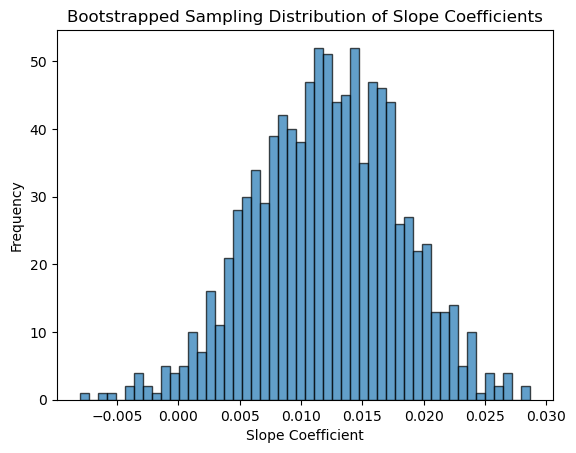

95% Bootstrap Confidence Interval for the Slope: [0.00059284 0.02329353]


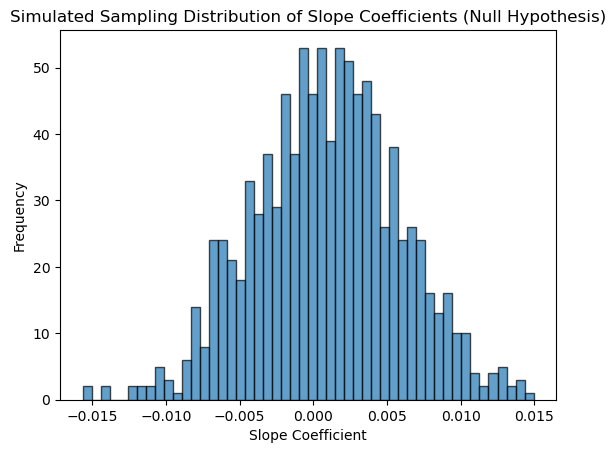

Simulated p-value under the null hypothesis: 0.016
Is 0 contained within the 95% bootstrap confidence interval? No
Simulated p-value from bootstrapped slope coefficients: 0.016


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

# Load the "Old Faithful Geyser" dataset
old_faithful = sns.load_dataset('geyser')

# Define long_wait_limit and filter data for long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Step 1: Bootstrapping and Visualizing the Slope Coefficients
n_bootstrap = 1000
bootstrapped_slope_coefficients = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Create bootstrap sample
    bootstrap_sample = old_faithful[long_wait].sample(n=160, replace=True)
    
    # Fit a linear regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Collect the slope coefficient
    bootstrapped_slope_coefficients.append(model.params['waiting'])

# Convert list to numpy array for easier analysis
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrapped sampling distribution of the slope coefficients
plt.hist(bootstrapped_slope_coefficients, bins=50, edgecolor='black', alpha=0.7)
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

# Compute the 95% confidence interval from the bootstrapped coefficients
bootstrap_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for the Slope: {bootstrap_ci}")

# Step 2: Simulating Samples under the Null Hypothesis
B0 = 1.65  # intercept
B1 = 0     # slope under null hypothesis (no linear relationship)
sigma = 0.37  # standard deviation of the noise

# Create a simulated version of the long_wait dataset
old_faithful_simulation = old_faithful[long_wait].copy()
np.random.seed(42)  # For reproducibility

# Simulate the 'duration' values under the null hypothesis
old_faithful_simulation['duration'] = B0 + B1 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=sigma).rvs(size=len(old_faithful_simulation))

# Create an array to store the simulated slope coefficients
simulated_slope_coefficients = []

# Simulate Simple Linear Regression models under the null hypothesis
for _ in range(n_bootstrap):
    # Sample with replacement from the simulated data
    simulated_sample = old_faithful_simulation.sample(n=160, replace=True)
    
    # Fit a linear regression model
    model = smf.ols('duration ~ waiting', data=simulated_sample).fit()
    
    # Collect the slope coefficient
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert list to numpy array
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the sampling distribution of the slope coefficients under the null hypothesis
plt.hist(simulated_slope_coefficients, bins=50, edgecolor='black', alpha=0.7)
plt.title('Simulated Sampling Distribution of Slope Coefficients (Null Hypothesis)')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

# Compute the p-value based on the simulation under the null hypothesis
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

print(f"Simulated p-value under the null hypothesis: {p_value}")

# Step 3: Reporting Results
# Check if 0 is contained within the 95% bootstrap confidence interval
is_zero_in_ci = 0 >= bootstrap_ci[0] and 0 <= bootstrap_ci[1]
print(f"Is 0 contained within the 95% bootstrap confidence interval? {'Yes' if is_zero_in_ci else 'No'}")

# Report the p-value and compare with the smf.ols result
print(f"Simulated p-value from bootstrapped slope coefficients: {p_value}")

## Explanation of Code
1. First we will bootstrap from the observed full dataset getting the paired values(predictor($x$), outcome($Y$)) with replacement. We are generating many bootstrap sets with a size of 160(n=160).
2. Every bootstrap sample we are estimating all the coefficients but more specifically the slope coefficient. We store the slope coefficients for later so that we could eventually use it to create a confidence interval.
3. We then create the histogram which is the first graph that shows the bootstrapped distribution of all slope coefficients that were fitted from the linear regression model. From that we generate the confidence interval.
4. We see that the slope coefficient 95% confidence interval is between the approximate values of 0.00059284 to 0.02329353.
5. Because the interval does not capture 0 it is highly unlikely that the true relationship between the 2 variables is 0. This is evidence to reject the null hypothesis at a 5% significance level.
6. The next part of the code we simulate under the null hypothesis where $\beta_{0}$(linear regression intercept) = 1.65, and the standard deviation $\sigma$ = 0.37. We then create a distribution from those chosen values also with the assumption that the true slope is 0 because the null hypothesis is that there is no linear association between the two variables.
7. The p-value is calculated by counting how many of the simulated slope coefficients are greater than or equal to the absolute value of the observed slope coefficient. This tells us how extreme the observed slope is, assuming the null hypothesis (no relationship) is true.
8. The p-value was 0.016 meaning you would see that observed data point or more extreme ones 1.6% of the time if the null hypothesis was true. The p-value is quite small so it provides some moderate evidence against the null hypothesis.


## Chat Summary
- __Objective:__ Test if there is a significant linear relationship between waiting time and eruption duration of the Old Faithful geyser.

__Hypotheses:__
- __Null hypothesis (H₀):__ No linear relationship between waiting time and eruption duration.
- __Alternative hypothesis (H₁):__ There is a linear relationship between waiting time and eruption duration.

__Result: p-value = 0.016.__
- This means there is a 1.6% probability of observing the data (or something more extreme) if the null hypothesis is true.

__Interpretation:__
- Since the p-value (0.016) is less than the significance level of 0.05, we reject the null hypothesis.
- We conclude that there is enough evidence to suggest a statistically significant linear relationship between waiting time and eruption duration.
<br>

- __Conclusion:__ The p-value supports rejecting the null hypothesis, indicating that the relationship between waiting time and eruption duration is not due to chance.

Link: https://chatgpt.com/share/672d6718-c140-800f-a58c-fff8ee228688

# Question 11
- So the changes that were made was instead of having an inequality of predictor($x$) variables of waiting time less than 64 or greater than 71 minutes we divided it into two. We used the equality less than 68 minutes(<68) where if the predictor variable is less than 68 minutes it is categorized as a short waiting time, and if the predictor variable is greater than 68 minutes the waiting time is considered long.

$$ Y_i = \beta_0 + \beta_1 \cdot \text{"long"}(k_i) + \epsilon_i $$

- What this essentially does is that when the predictor variable is considered long, $k_{i}$ takes the value of 1.
- If the predictor variable is categorized as short, $k_{i}$ takes the value of 0. This would make the whole slope coefficient equal 0 based off of the equation above.
- This is used as a binary indicator variable where it distinguishes between the short and long wait times.
__The key difference is the way the data is treated:__
- For smf.ols('duration ~ waiting', data=old_faithful), this uses the full dataset to create its simple linear regression. The waiting variable is also continuous.
- For smf.ols('duration ~ waiting', data=old_faithful[short_wait]), this is stil continuous however it focuses more on the short waiting time portion of the waiting time variable.
- Conversely, smf.ols('duration ~ waiting', data=old_faithful[long_wait]) is a subset that focuses more on the long waiting times and estimates relationships from that group.
- For the recent change in this question, the big picture difference between those previous ones and this is how the predictor variable instead of being continuous it is categorical. What this equation does is that it groups all of the predictor variables that are less than 68 minutes into one category which is the short waiting time category instead of being continuous. Similarly, all the predictor variables that are greater than 68 minutes are grouped into another category which is the long waiting time category.
<br>

- This is why at the code below it displays two box plots, one with the short category and the other as the long category. It collects all those outcome variables($Y$) that had a predictor varible less than 68 minutes and placed them on the box plot. Similarly with the long category it collected all the outcome variables($Y$) that had a predictor variable greater than 68 minutes and visualized them via a box plot.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


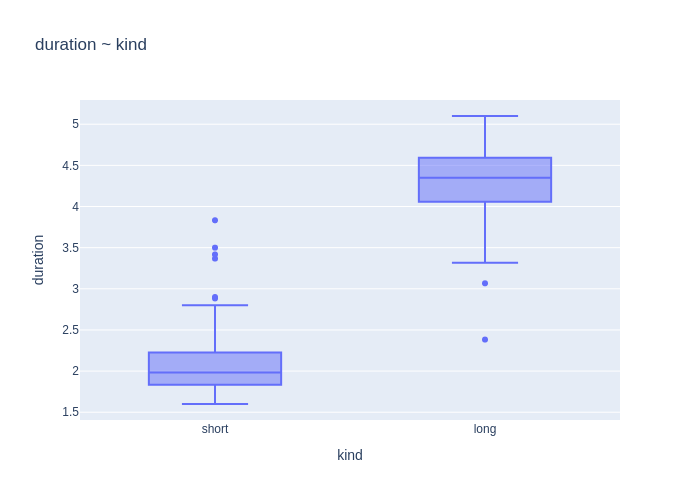

In [10]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") 


# Evidence against Null Hypothesis
- Regarding the evidence, the null hypothesis is that there is no difference between the groups on aveage for their eruption duration times.
- The alternate hypothesis is that there is a difference between the average eruption duration times.
- The average duration of the eruption is 2.2036 units longer because the intercept is the average eruption duration of the short waiting time based on the equation. This is becaues when the predictor variable was categorized as short the slope coefficient became 0 from $k_{i}$.
- The p-value is also 0.000 or very close to 0 meaning it is very strong evidence to reject the null hypothesis.
- Finally, the confidence interval for the coefficient is between [2.101, 2.306] which does not include 0 further strengthening the idea that there is a significant difference.

# Chat Summary
__Here's a more detailed summary in bullet points that captures the essence of our conversation:__

- __Intercept (2.0943):__ The average eruption duration for the "short" wait times.
- __Coefficient for "long" (2.2036):__ This indicates the difference in eruption duration between "long" and "short" wait times. It means that the eruption duration for "long" wait times is, on average, 2.2036 units longer than the eruption duration for "short" wait times.
- __Average eruption duration for "long" wait times:__ Since the "short" wait time category has an average duration of 2.0943 units, the "long" wait time category has an average eruption duration of 2.0943 + 2.2036 = 4.2979 units.
- The model uses an indicator variable ("kind") to categorize the wait times as "short" or "long" and estimates the effect of this categorization on eruption duration.
- __Difference between the models:__ This model groups the wait times into two categories (short and long), while previous models looked at continuous "waiting" values. The coefficient for "long" indicates how much the duration differs when the wait time is classified as "long."
- __Null hypothesis ("no difference between groups"):__ The null hypothesis tests if there is no difference in eruption durations between the "short" and "long" wait time categories. Based on the p-values in the output, the null hypothesis is rejected, suggesting that there is a statistically significant difference in eruption durations between the two groups.

Link: https://chatgpt.com/share/672d75cb-6f4c-800f-874b-177120e89e8c

# Question 12


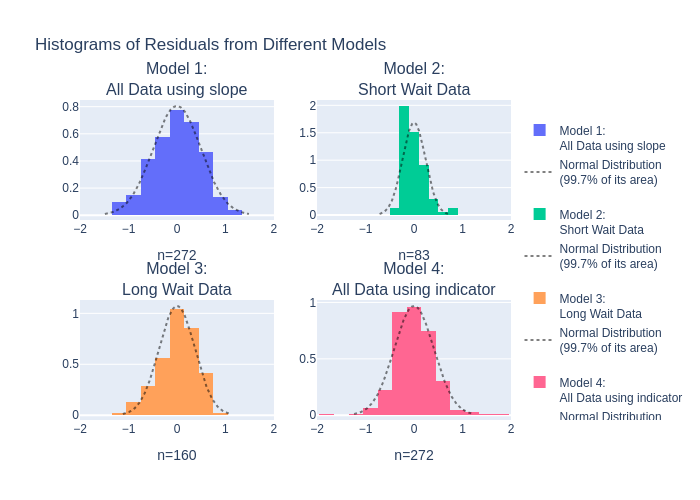

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") 

- Based on these 4 graphs it appears as though model one is the most plausible for the assumption that the distribution of error terms is normal. This is because the model most resembles a normal distribution meaning the residual terms are symmetrical and follow a bell-shaped curve which are characteristics of a normal distribution. The black dashed line is the normal distribution line and this model is accurate to that black dashed line compared to the other ones.
- Model 2 does not support this assumption because it looks like there is a high concentration of residual terms tightly packed around the mean with no residuals on the extreme tail end. A normal distribution would not just be clustered tightly around the mean but would rather have a smooth spread of values.
- Model 3 appears to be left-skewed which shows that the number of residual terms less than 0 compared to greater than 0 are not symmetrical which is not reflected for a normal distribution.
- Similarly, model 4 has a right skewed distribution which is not symmetrical and again does not accurately represent a normal distribution.

# Question 13

- Permutation testing is all about shuffling the group labels of the data points repeatedly, then calculating the test statistic—here, that's the difference in sample means—for each of these reshuffled datasets. By doing this, we can get a sense of what the distribution of the test statistic looks like under the null hypothesis (which assumes there’s actually no difference between the two groups). This way, we’re essentially seeing how likely our observed result would be if the groups were identical.
- As mentioned before, bootstrap resampling involves creating new datasets by sampling from the observed data with replacement, then calculating the mean difference for each resample. This method helps estimate the sampling distribution of the test statistic and allows us to construct a confidence interval.

In [16]:
import numpy as np
import pandas as pd

# Creating a sample dataset to ensure the code runs
np.random.seed(0)  # Setting a random seed for reproducibility
old_faithful = pd.DataFrame({
    'kind': np.random.choice(['short', 'long'], size=100),
    'duration': np.random.normal(10, 2, size=100)
})

### (A) Permutation Test

# Step 1: Calculate the observed difference in means between the two groups.
observed_statistic = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Print the observed mean difference for verification
print("Observed mean difference:", observed_statistic)

# Step 2: Initialize an empty list to store mean differences from permuted data
permuted_differences = []

# Step 3: Set the number of permutations
n_permutations = 1000  # Using 1000 for quick testing; adjust as needed

# Step 4: Loop to perform the permutation test
for _ in range(n_permutations):
    # Shuffle the 'kind' labels randomly
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)

    # Calculate the mean difference for the shuffled dataset
    mean_diff_shuffled = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]

    # Store this mean difference in the permuted_differences list
    permuted_differences.append(mean_diff_shuffled)

# Step 5: Calculate the p-value
p_value = np.mean([abs(diff) >= abs(observed_statistic) for diff in permuted_differences])

print("Permutation Test p-value:", p_value)


### (B) Bootstrap Confidence Interval

# Step 1: Initialize an empty list to store bootstrapped mean differences
bootstrapped_differences = []

# Step 2: Set the number of bootstrap samples
n_bootstrap_samples = 1000  # Using 1000 for testing; adjust as needed

# Step 3: Loop to perform the bootstrap sampling
for _ in range(n_bootstrap_samples):
    # Resample each group with replacement to generate a new "bootstrap" sample
    bootstrapped_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)

    # Calculate the mean difference for each bootstrap sample
    mean_diff_bootstrap = bootstrapped_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

    # Store this mean difference in the bootstrapped_differences list
    bootstrapped_differences.append(mean_diff_bootstrap)

# Step 4: Calculate the 95% confidence interval from the bootstrap distribution
conf_interval = np.percentile(bootstrapped_differences, [2.5, 97.5])

print("Bootstrap 95% Confidence Interval:", conf_interval)

Observed mean difference: -0.39378870133252164
Permutation Test p-value: 0.316
Bootstrap 95% Confidence Interval: [-1.13984172  0.33573088]


## (A) Permutation Test
__Calculate Observed Mean Difference:__
- Compute the observed mean difference in 'duration' between the two actual groups (e.g., 'short' and 'long' waiting times).

__Initialize List for Permuted Differences:__
- Create an empty list to store mean differences calculated from permuted datasets.

__Loop for Permutations:__
- Repeat the following steps a large number of times (e.g., 1,000 or 10,000) to generate a distribution under the null hypothesis:
- Shuffle Labels: Randomly reassign the group labels ('kind'), disrupting any true group structure.
- Calculate Mean Difference: Compute the mean difference between the reshuffled groups.
- Store Difference: Append each mean difference from the reshuffled data to the list of permuted differences.

__Calculate p-value:__
- Compare the observed mean difference to the distribution of permuted differences.
- Calculate the p-value by checking how many permuted differences are as extreme as the observed difference.

## (B) Bootstrap Confidence Interval
__Initialize List for Bootstrapped Differences:__
- Create an empty list to store mean differences calculated from bootstrapped samples.

__Loop for Bootstrapping:__
- Repeat the following steps a large number of times (e.g., 1,000 or 10,000) to generate a distribution of mean differences:
- Resample Each Group: For each group (e.g., 'short' and 'long'), resample the data with replacement, creating a "bootstrap" sample.
- Calculate Mean Difference: Compute the mean difference for each resample.
- Store Difference: Append each mean difference to the list of bootstrapped differences.

__Calculate 95% Confidence Interval:__
- Use the 2.5th and 97.5th percentiles from the distribution of bootstrapped mean differences to construct a 95% confidence interval for the true mean difference.

## Chat Summary

__Permutation Test:__
- Shuffles group labels and calculates mean difference for each reshuffled dataset.
- Repeats the process many times to generate a distribution under the null hypothesis.
- Compares observed statistic to this distribution to calculate a p-value.

__Bootstrap Confidence Interval:__
- Resamples original data with replacement, calculating the mean difference for each sample.
- Repeats the process many times.
- Constructs a 95% confidence interval from the 2.5th and 97.5th percentiles of the bootstrapped mean differences.

__Comparison with Indicator Variable Model:__
- Permutation Test: Focuses on reshuffling group labels and assumes exchangeability.
- Bootstrap: Resamples data to estimate variability and creates a confidence interval.
- Indicator Variable Model: Uses regression and assumes linear relationships to test group differences.

Link: https://chatgpt.com/share/672d9173-eb74-800f-9b50-5edacb60c8dd